In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy import signal

Given a signal expressed as a sum of sinusoids:

$$
x(n) = \sum_{k=1}^{N_x}a_ke^{jw_kn}
$$

Frequency $w_k$ down-shifted to $w_k-w_c$ using:

$$
x_c(n) = e^{-jw_cn} x(n) 
$$

With above apporach, we're able to apply an uniform low-pass filter to eliminate the signal outside the bandwidth.

$$
H(n)x_c(n)
$$

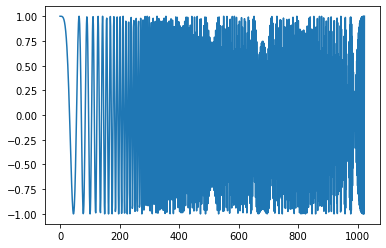

In [2]:
fs = 1024
subband_size = 8

n = np.linspace(0, fs-1, num=fs)

h = np.hamming(subband_size)
h = np.ones(subband_size)

X = np.zeros((subband_size, fs), dtype=complex)

t = np.linspace(0, 1, fs)
xn = signal.chirp(t, f0=0.01, f1=fs//2, t1=1, method='linear')
# xn = np.sin(2 * np.pi * t * 90)
plt.plot(xn)
plt.show()

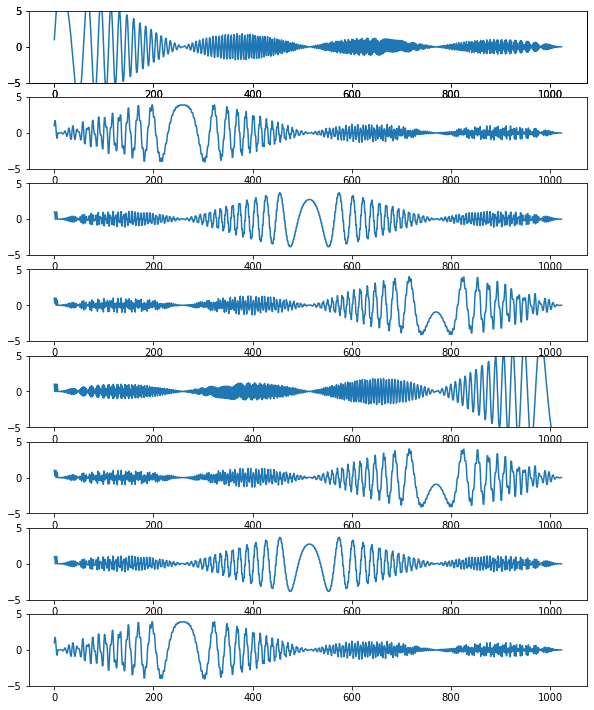

In [3]:
for i in range(subband_size):
    wc = 2 * np.pi * i / subband_size
    xc = np.exp(-1j * wc * n) * xn
    X[i] = signal.lfilter(h, 1, xc)

fig = plt.figure()
fig.set_size_inches(10, 14, forward=True)

main_plt = fig.add_subplot(subband_size+1,1,1)
main_plt.plot(xn)
main_plt.set_ylim(-5, 5)

for i in range(subband_size):    
    subband_plt = fig.add_subplot(subband_size+1,1,1+i)
    subband_plt.plot(X[i].real)
    subband_plt.set_ylim(-5, 5)

plt.show()

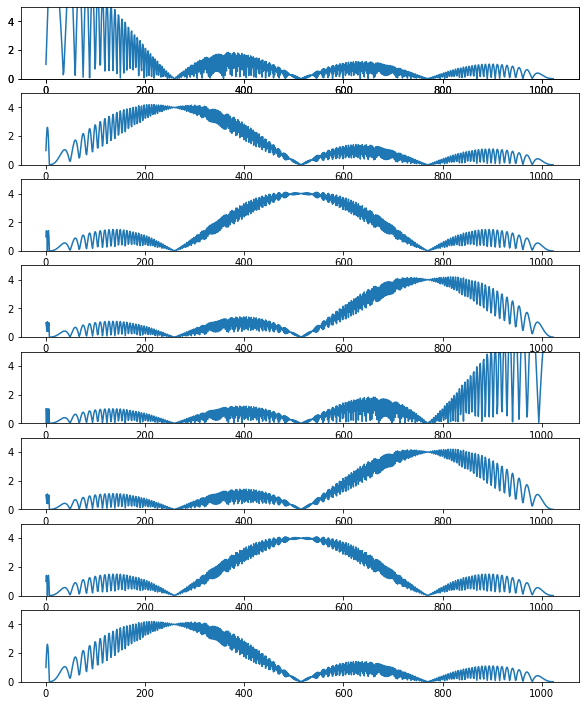

In [4]:
for i in range(subband_size):
    wc = 2 * np.pi * i / subband_size
    xc = np.exp(-1j * wc * n) * xn
    X[i] = signal.lfilter(h, 1, xc)

fig = plt.figure()
fig.set_size_inches(10, 14, forward=True)

main_plt = fig.add_subplot(subband_size+1,1,1)
main_plt.plot(xn)
main_plt.set_ylim(0, 5)

for i in range(subband_size):    
    subband_plt = fig.add_subplot(subband_size+1,1,1+i)
    subband_plt.plot(np.abs(X[i]))
    subband_plt.set_ylim(0, 5)

plt.show()

In [5]:
def get_modulator(N):
    output_data = np.zeros(N, dtype=complex)
    for i in range(N):
        wk = -1j * 2 * np.pi * (i)/N
        output_data[i] = np.exp(wk)
    return output_data
        
def shift_in_time_domain(x, modulator):
    output_data = x * modulator
    return output_data

def down_sampling(x, ratio):
    return x[::ratio]

def low_pass_filtering_in_frequency_domain(x, fs, cutoff):
    filtered_x = signal.filtfilt(b, a, x)
    return filtered_x

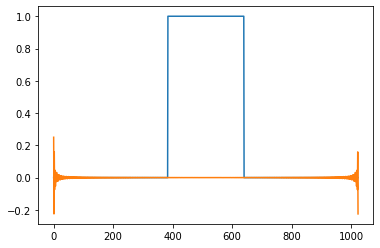

In [6]:
window = np.concatenate((np.zeros(256+128), np.ones(256), np.zeros(256+128)))
# window = np.concatenate((np.ones(128), np.zeros(128+64)))

FLIP = np.fft.ifft(window)

plt.plot(window)
plt.plot(FLIP.real)